# DS 2.1 notes

Monday August 26th

In [69]:
import pandas as pd 
import numpy as np
  
# initialize list of lists 
data = [[1000, 2], [1500, 3]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['x', 'y']) 
  
# print dataframe. 
df

,x,y
0,1000,2
1,1500,3


# Min Max Scaler
---

In [74]:
def max_min_scaler(matrix):
    return pd.DataFrame(zip(*[(np.array(matrix[column]) - min(matrix[column])) / (max(matrix[column]) - (min(matrix[column]))) for column in matrix]), columns = matrix.columns)
max_min_scaler(df)

,x,y
0,0.0,0.0
1,1.0,1.0


In [75]:
new_df = df.copy()
for column in df:
    col_range = max(df[column]) - min(df[column])
    col_arr = np.array(df[column])
    col_arr -= min(col_arr)
    col_arr = col_arr / col_range
    new_df[column] = col_arr
new_df

,x,y
0,0.0,0.0
1,1.0,1.0


## Use sklearn to do it for us

In [81]:
import sklearn
sklearn.__version__

'0.21.2'

In [79]:
from sklearn import preprocessing


X_train = np.array([[1000, 2], [1500, 3]])

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
print(X_minmax)

[[0. 0.]
 [1. 1.]]


## Standard Scaling

### Do it yourself:

In [109]:
def standard_scaler(np_matrix):
    return (np_matrix - np_matrix.mean(axis=0)) / np_matrix.std(axis=0)
standard_scaler(X_train)

array([[-1., -1.],
       [ 1.,  1.]])

### Let sklearn do it

In [108]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit_transform(X_train)

array([[-1., -1.],
       [ 1.,  1.]])

Wednesday Aug 28th

## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])


Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

Text(0, 0.5, 'Water Drinks (Litre)')

## How do we find the line of best fit?

### We can try a creating our own line and finding its error

6.518593101764703


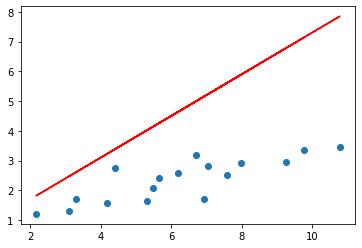

In [77]:
predicted_y_values = list(map(lambda x: 0.7*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### We can use this function to find the mean squared error of the line

In [32]:
def find_error(x_values, y_values, w0, w1):
    total = 0
    for x, y in zip(x_values, y_values):
        total += (y - ((w1 * x) + w0)) ** 2
    return total / len(x_values)

In [33]:
find_error(X, Y, 0.3, 0.7)

6.518593101764703

In [38]:
def find_error(x_values, y_values, w0, w1):
    return np.mean([(y - ((w1 * x) + w0)) ** 2 for x,y in zip(x_values, y_values)])

In [71]:
find_error(X, Y, 0.5, 0.3)

0.16668653705882344

In [132]:
# This is garbage, has nothing to do with class. disregard it.
def weird_avg(values):
    ''''''
    curr = None
    for val in values:
        if curr is None:
            curr = val
        else:
            curr = (curr + val) / 2
    return curr

### If we change the slope and y-int to 0.3 and 0.8 the line becomes more accurate

predicted_y_values = list(map(lambda x: 0.3*x + 0.8, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### It looks good but how to we find out the best slope and y int?

In [85]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.25163494]]
[0.79880123]


### This is the lowest error we'll have

In [74]:
find_error(X, Y, 0.79880123, 0.25163494)

0.15385767404191164

0.15385767404191164


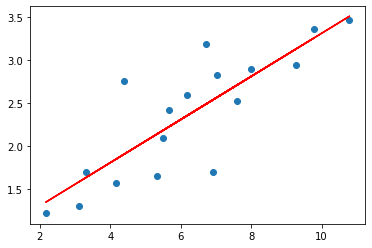

In [83]:
predicted_y_values = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

In [84]:
0.25163494*5 + 0.79880123

2.05697593

### We can also predict the value of another point using the predict method

In [89]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

#### Numpy allows us to reshape arrays with unlimited dimensions.

#### It's useful for sklearn because many methods require 2d arrays.

In [134]:
np.array([i for i in range(64)]).reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

#### How to predict a value given a few parameters or "features"... 

- Visit DS2.1-Machine-Learning/Notebooks/simple_learn_regression.ipynb

In [138]:
x = np.array([[1,3],[7,2]])
x

array([[1, 3],
       [7, 2]])